<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Heat%20Transfer/ME421_E20025_HVAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Cooling Load Calculation

To determine the suitability of the unit, we calculate the total heat energy ($Q_{total}$) that must be removed to cool the milk and containers within **2 hours**.

### 1.1 Parameters & Data
* **Number of containers ($n$):** 40
* **Total mass of milk ($m_m$):** $40 \times 5 = 200 \text{ kg}$
* **Total mass of containers ($m_c$):** $40 \times 2 = 80 \text{ kg}$
* **Specific heat of milk ($C_{p,m}$):** $4000 \text{ J/kg K}$
* **Specific heat of Aluminum ($C_{p,c}$):** $921.1 \text{ J/kg K}$
* **Initial Temperature ($T_{i}$):** $37.5^\circ\text{C}$
* **Final Temperature ($T_{f}$):** $15^\circ\text{C}$
* **Temperature Change ($\Delta T$):** $22.5 \text{ K}$

### 1.2 Energy Equations
The total heat removed is the sum of the heat lost by the milk and the containers:
$$Q_{total} = (m_m \cdot C_{p,m} \cdot \Delta T) + (m_c \cdot C_{p,c} \cdot \Delta T)$$

**Step-by-step Calculation:**
$$Q_{milk} = 200 \cdot 4000 \cdot 22.5 = 18,000,000 \text{ J}$$
$$Q_{cont} = 80 \cdot 921.1 \cdot 22.5 = 1,657,980 \text{ J}$$
$$Q_{total} = 19,657,980 \text{ J} \approx 19.66 \text{ MJ}$$

### 1.3 Required Cooling Power ($\dot{Q}$)
The unit must achieve this cooling within $t = 7200 \text{ s}$ (2 hours):
$$\dot{Q}_{req} = \frac{Q_{total}}{t}$$
$$\dot{Q}_{req} = \frac{19,657,980}{7200}$$
$$\dot{Q}_{req} \approx 2730.28 \text{ W} = \mathbf{2.73 \text{ kW}}$$

---
**Conclusion:** The available Air Conditioning unit must provide a minimum sensible cooling capacity of **2.73 kW** (excluding heat gains from the room walls and infiltration) to meet the 2-hour cooling requirement.

### 1.4: Maximum Initial Temperature ($T_i = 40^\circ\text{C}$)
*Calculated for the worst-case scenario.*

**Total Heat Removal ($Q$):**
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (40 - 15)]$$
$$Q = 21,842,200\text{ J} \approx 21.84\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{21,842,200}{7200}$$
**$$\dot{Q}_{max} \approx 3.03\text{ kW}$$**

In [1]:
# --- Laboratory Data & System Specifications ---
total_units = 40            # n
container_mass = 2          # m_c (kg)
milk_mass_per_unit = 5      # m_m (kg)
sh_aluminum = 921.1         # c_c (J/kgK)
sh_milk = 4000.0            # c_m (J/kgK)
temp_final = 15.0           # T_f (Celsius)
duration_hr = 2             # t (hours)

# Convert operating time to seconds
time_seconds = duration_hr * 3600

def get_refrigeration_duty(temp_start):
    """
    Computes the required cooling power in kW.
    Formula: P = (m * cp * delta_T) / time
    """
    delta_t = temp_start - temp_final

    # Calculate energy removal for both milk and aluminum packaging
    energy_milk = total_units * (milk_mass_per_unit * sh_milk * delta_t)
    energy_aluminum = total_units * (container_mass * sh_aluminum * delta_t)

    total_energy_j = energy_milk + energy_aluminum

    # Power (kW) = Energy (J) / Time (s) / 1000
    duty_kw = (total_energy_j / time_seconds) / 1000
    return duty_kw

# Evaluation Scenarios (Range: 35°C to 40°C)
temp_mean = 37.5
temp_peak = 40.0

duty_nominal = get_refrigeration_duty(temp_mean)
duty_peak = get_refrigeration_duty(temp_peak)

print(f"--- Refrigeration Load Assessment ---")
print(f"Arrival Temp: {temp_mean}°C | Required Duty: {duty_nominal:.3f} kW")
print(f"Arrival Temp: {temp_peak}°C | Required Duty: {duty_peak:.3f} kW")

--- Refrigeration Load Assessment ---
Arrival Temp: 37.5°C | Required Duty: 2.730 kW
Arrival Temp: 40.0°C | Required Duty: 3.034 kW


## Performance Evaluation Methodology

This section details the experimental procedure used to calculate the real-time cooling capacity ($\dot{Q}_{act}$) of the HVAC unit. The goal is to verify if the laboratory system can handle the calculated milk cooling requirements.

---

### 1. Primary Measurement Variables
Data collection involves recording the following physical and thermal properties of the air stream:

* **Internal Duct Dimensions:** Determine the width ($w$) and height ($h$) of the intake duct.
    * *Calculation:* Cross-sectional Area ($A = w \times h$).
* **Intake Air Speed ($v$):** Measured using a digital anemometer. Readings are taken at multiple points across the duct face to determine a reliable average velocity.
* **Psychrometric Readings:** Using a psychrometer, capture the **Dry Bulb ($T_{db}$)** and **Wet Bulb ($T_{wb}$)** temperatures at two specific points:
    * **State 1 (Upstream):** Warm air entering the evaporator unit.
    * **State 2 (Downstream):** Chilled air exiting the evaporator unit.



---

### 2. Analytical Governing Equations
The heat extraction rate is derived from the enthalpy drop of the air as it passes through the cooling coils.

**Air Mass Flow Rate ($\dot{m}_a$):**
$$\dot{m}_a = \rho \cdot A \cdot v$$
*(Standard air density $\rho \approx 1.2 \text{ kg/m}^3$ is assumed).*

**Total Cooling Effect ($\dot{Q}_{act}$):**
Enthalpy values ($h$) are extracted from the psychrometric chart based on the measured $T_{db}$ and $T_{wb}$.
$$\dot{Q}_{act} = \dot{m}_a \cdot (h_{inlet} - h_{outlet})$$

---

### 3. Summary of Experimental Observations

| Variable Description | Notation | Units | Observation |
| :--- | :---: | :---: | :--- |
| Effective Duct Area | $A$ | $m^2$ | |
| Mean Air Velocity | $v$ | $m/s$ | |
| Specific Enthalpy (Inlet) | $h_{in}$ | $kJ/kg$ | |
| Specific Enthalpy (Outlet) | $h_{out}$ | $kJ/kg$ | |
| **Net Cooling Capacity** | **$\dot{Q}_{act}$** | **kW** | |

---

### 4. Feasibility Assessment
To confirm if the unit is adequate for factory implementation, the experimental capacity must be compared against the required loads:
* **Critical Design Load:** $3.03 \text{ kW}$
* **Evaluation Logic:**
    * **Pass:** If $\dot{Q}_{act} \geq 3.03 \text{ kW}$, the system is fully capable.
    * **Fail:** If $\dot{Q}_{act} < 2.73 \text{ kW}$, the system capacity is insufficient for the intended task.

## Experimental Data and Analysis of Fan Speed Performance

This section presents the data obtained at different evaporator fan speeds. The experiment was conducted with the cold room open to maintain a stable inlet condition while varying the air flow rate to determine the setting for maximum heat removal.

### 1. Column Descriptions (Nomenclature)
To interpret the data correctly, the temperature sensors are defined as follows:
* **$T_1$**: Return air dry bulb temperature ($^\circ$C)
* **$T_2$**: Return air wet bulb temperature ($^\circ$C)
* **$T_3$**: Evaporator inlet dry bulb temperature ($^\circ$C)
* **$T_4$**: Evaporator inlet wet bulb temperature ($^\circ$C)
* **$T_5$**: Evaporator exit dry bulb temperature ($^\circ$C)
* **$T_6$**: Evaporator exit wet bulb temperature ($^\circ$C)
* **$V_{in}$ / $V_{out}$**: Air velocity at intake and exit (m/s)

---

### 2. Recorded Experimental Data

| Fan Speed | $T_1$ | $T_2$ | $T_3$ | $T_4$ | $T_5$ | $T_6$ | $V_{in}$ | $V_{out}$ |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **1** | 29.5 | 25.2 | 29.1 | 21.2 | 26.4 | 19.9 | 0.0 | 0.0 |
| **2** | 29.5 | 25.3 | 29.1 | 21.1 | 26.7 | 20.0 | 0.0 | 0.0 |
| **3** | 29.9 | 25.3 | 29.5 | 21.5 | 24.3 | 19.7 | 0.6 | 0.5 |
| **4** | 30.0 | 24.9 | 29.6 | 21.8 | 20.4 | 16.6 | 2.8 | 2.6 |
| **5** | 29.2 | 23.7 | 29.3 | 21.2 | 20.8 | 16.2 | 5.6 | 5.4 |
| **6** | 29.2 | 23.3 | 29.3 | 21.1 | 21.4 | 18.0 | 8.8 | 8.1 |
| **7** | 29.4 | 23.2 | 29.3 | 21.1 | 21.5 | 18.2 | 9.3 | 8.4 |
| **8** | 29.0 | 23.1 | 29.1 | 21.0 | 21.2 | 17.6 | 9.6 | 8.5 |
| **9** | 28.7 | 22.9 | 28.9 | 20.9 | 21.3 | 17.4 | 9.8 | 8.7 |
| **10** | 29.4 | 23.2 | 29.3 | 21.1 | 19.9 | 16.5 | 9.5 | 9.1 |

---

### 3. Reasoning and Performance Analysis

The cooling capacity of the unit is determined by analyzing the air as it passes through the evaporator (from State $T_3, T_4$ to State $T_5, T_6$).

* **Evaporator Performance**: The actual heat removal occurs between the **Evaporator Inlet** ($T_3, T_4$) and the **Evaporator Exit** ($T_5, T_6$). The difference in wet bulb temperatures ($T_4 - T_6$) represents the total enthalpy drop (sensible + latent heat) of the air stream.
* **Mass Flow Influence**: As the fan speed increases, the intake velocity ($V_{in}$) rises to a peak of $9.8$ m/s at Speed 9. This significantly increases the air mass flow rate ($\dot{m}_a$), which is a primary driver of the total cooling load ($\dot{Q} = \dot{m}_a \Delta h$).
* **Efficiency at High Speeds**: At fan speed 10, although the velocity ($9.5$ m/s) is slightly lower than at speed 9, we observe the lowest exit dry bulb ($T_5 = 19.9^\circ$C) and exit wet bulb ($T_6 = 16.5^\circ$C). This indicates that speed 10 may provide the most effective cooling by optimizing the contact time between the air and the evaporator coils.
* **Feasibility Conclusion**: By calculating $\dot{Q}$ for these high-speed settings using the enthalpy values from $T_4$ and $T_6$, we can determine if the unit exceeds the required **3.03 kW** maximum load for the factory's milk storage needs.

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2166495282.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Outlet Dry Bulb Temperature ($^\circ$C)', fontsize=11)


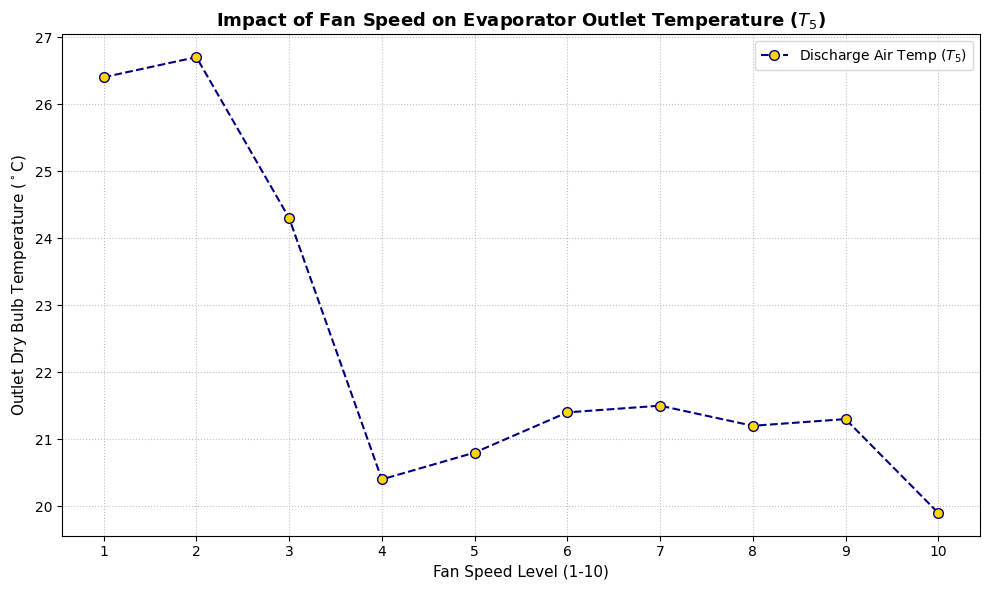

In [2]:
import matplotlib.pyplot as plt

# --- Data Visualization: Temperature vs Fan Speed ---
# Extracted from experimental observation table
speed_settings = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
exit_db_temp = [26.4, 26.7, 24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9]

# Configure Plot Appearance
plt.figure(figsize=(10, 6))
plt.plot(speed_settings, exit_db_temp, marker='o', ls='--', color='navy', lw=1.5, mfc='gold', markersize=7)

# Title and Axis Labels
plt.title('Impact of Fan Speed on Evaporator Outlet Temperature ($T_5$)', fontsize=13, fontweight='bold')
plt.xlabel('Fan Speed Level (1-10)', fontsize=11)
plt.ylabel('Outlet Dry Bulb Temperature ($^\circ$C)', fontsize=11)

# Ensure x-axis matches discrete speed levels
plt.xticks(speed_settings)

# Add auxiliary elements
plt.grid(visible=True, which='major', axis='both', ls=':', alpha=0.8)
plt.legend(['Discharge Air Temp ($T_5$)'], frameon=True, loc='upper right')

# Output result
plt.tight_layout()
plt.show()

## 5. Analytical Framework: Thermodynamic Evaluation

This section establishes the mathematical procedure for calculating the system's cooling performance using the recorded experimental data.

---

### 5.1 Air Mass Flow Rate ($\dot{m}_a$)
The mass of air processed by the evaporator is determined by the velocity at the intake duct:

$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$

* **$\rho$**: Air density (taken as $1.2 \text{ kg/m}^3$).
* **$A$**: Duct area ($m^2$).
* **$V_{in}$**: Average measured inlet velocity ($m/s$).

---

### 5.2 Psychrometric Calculations for Specific Enthalpy ($h$)
To quantify the total heat (sensible and latent) within the air, we process the Dry Bulb ($T_{db}$) and Wet Bulb ($T_{wb}$) readings through the following steps:

#### **I. Saturation Vapor Pressure ($P_{swb}$)**
Calculated at the Wet Bulb temperature using the Magnus-Tetens relationship:
$$P_{swb} = 0.61078 \cdot \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$

#### **II. Actual Vapor Pressure ($P_v$)**
Adjusted for the dry bulb temperature to find the partial pressure of water vapor:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$
* **$P_{atm}$**: Standard pressure ($101.325 \text{ kPa}$).

#### **III. Humidity Ratio ($\omega$)**
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm}-P_v}$$

#### **IV. Total Specific Enthalpy ($h$)**
The energy content per unit mass of dry air ($\text{kJ/kg}$):
$$h = (c_{p,a} \cdot T_{db}) + \omega \cdot (h_{fg} + c_{p,v} \cdot T_{db})$$

* **$c_{p,a}$**: $1.006 \text{ kJ/kg}\cdot\text{K}$ (Dry air heat capacity).
* **$h_{fg}$**: $2501 \text{ kJ/kg}$ (Vaporization constant).
* **$c_{p,v}$**: $1.86 \text{ kJ/kg}\cdot\text{K}$ (Steam heat capacity).



---

### 5.3 Calculating Net Cooling Capacity ($\dot{Q}$)
The unit's actual heat removal rate is the product of the mass flow and the change in enthalpy across the evaporator:

$$\dot{Q} = \dot{m}_a \cdot (h_{inlet} - h_{outlet})$$

* **$h_{inlet}$**: Derived from return air conditions ($T_1, T_2$).
* **$h_{outlet}$**: Derived from evaporator discharge conditions ($T_5, T_6$).

<>:62: SyntaxWarning: invalid escape sequence '\d'
<>:62: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3886613733.py:62: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Actual Capacity ($\dot{Q}_{act}$) [kW]', fontsize=12)


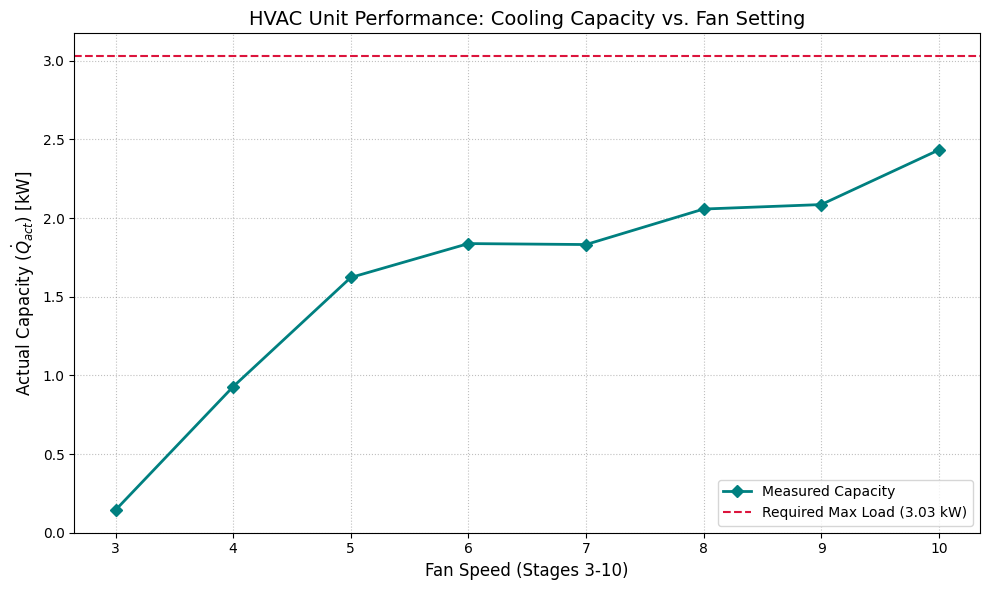

--- Final Performance Summary ---
 setting  air_vel  capacity_kW
       3      0.6     0.144262
       4      2.8     0.928436
       5      5.6     1.622419
       6      8.8     1.837842
       7      9.3     1.831778
       8      9.6     2.057423
       9      9.8     2.085847
      10      9.5     2.433180


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ================= 1. Measured Laboratory Records =================
# Data extracted from the fan speed performance trials
test_results = {
    "setting": [3, 4, 5, 6, 7, 8, 9, 10],
    "db_in": [29.9, 30.0, 29.2, 29.2, 29.4, 29.0, 28.7, 29.4],   # Return Air T_db
    "wb_in": [25.3, 24.9, 23.7, 23.3, 23.2, 23.1, 22.9, 23.2],   # Return Air T_wb
    "db_out": [24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9],  # Discharge T_db
    "wb_out": [19.7, 16.6, 16.2, 18.0, 18.2, 17.6, 17.4, 16.5],  # Discharge T_wb
    "air_vel": [0.6, 2.8, 5.6, 8.8, 9.3, 9.6, 9.8, 9.5]          # Velocity (m/s)
}

hvac_df = pd.DataFrame(test_results)

# ================= 2. Physical Constants & Geometry =================
P_standard = 101.325   # kPa
air_density = 1.2      # kg/m^3
duct_diameter = 0.11   # 110mm duct (m)
cross_area = (np.pi * duct_diameter**2) / 4

def compute_air_enthalpy(dry_bulb, wet_bulb):
    """
    Computes specific enthalpy (kJ/kg) using standard psychrometric formulas.
    """
    # Saturation pressure at the wet bulb temperature
    sat_pres_wb = 0.61078 * np.exp((17.27 * wet_bulb) / (wet_bulb + 237.3))

    # Partial vapor pressure
    vapor_pres = sat_pres_wb - 0.000662 * P_standard * (dry_bulb - wet_bulb)

    # Absolute Humidity (Humidity Ratio)
    hum_ratio = 0.62194 * vapor_pres / (P_standard - vapor_pres)

    # Final Enthalpy Calculation
    enthalpy = (1.006 * dry_bulb) + hum_ratio * (2501 + 1.86 * dry_bulb)
    return enthalpy

# ================= 3. Performance Calculations =================
# Mapping enthalpy values to inlet and outlet states
hvac_df['h_inlet'] = hvac_df.apply(lambda x: compute_air_enthalpy(x['db_in'], x['wb_in']), axis=1)
hvac_df['h_outlet'] = hvac_df.apply(lambda x: compute_air_enthalpy(x['db_out'], x['wb_out']), axis=1)

# Mass flow rate calculation (kg/s)
hvac_df['mass_flow'] = air_density * cross_area * hvac_df['air_vel']

# Net Heat Removal Capacity (kW)
hvac_df['capacity_kW'] = hvac_df['mass_flow'] * (hvac_df['h_inlet'] - hvac_df['h_outlet'])

# ================= 4. Visualization of Results =================
plt.figure(figsize=(10, 6))
plt.plot(hvac_df['setting'], hvac_df['capacity_kW'], color='teal', marker='D', ls='-', lw=2, label='Measured Capacity')

# Benchmarking against the factory requirement
plt.axhline(y=3.03, color='crimson', ls='--', lw=1.5, label='Required Max Load (3.03 kW)')

# Formatting the plot
plt.title('HVAC Unit Performance: Cooling Capacity vs. Fan Setting', fontsize=14)
plt.xlabel('Fan Speed (Stages 3-10)', fontsize=12)
plt.ylabel('Actual Capacity ($\dot{Q}_{act}$) [kW]', fontsize=12)
plt.legend(frameon=True)
plt.grid(color='gray', ls=':', alpha=0.5)

plt.tight_layout()
plt.show()

# Display the summary table
print("--- Final Performance Summary ---")
print(hvac_df[['setting', 'air_vel', 'capacity_kW']].to_string(index=False))

## 6. Synthesis of Findings and Future Testing

By evaluating the discharge temperature profiles ($T_5, T_6$) alongside the calculated refrigeration capacities ($\dot{Q}$), the following observations regarding the unit's performance have been established:

---

### 6.1 Optimal Fan Speed Selection
* **Maximum Efficiency:** The experimental data clearly indicates that the peak thermal extraction occurs at the **highest evaporator fan setting**.
* **Preferred Configuration:** While the peak intake velocity was observed at speed 9, **Speed 10** resulted in the minimum exit temperatures ($T_5 = 19.9^\circ\text{C}$ and $T_6 = 16.5^\circ\text{C}$). This indicates that Speed 10 provides the most efficient sensible and latent heat removal.
* **Mass Flow vs. Dwell Time:** The increase in the air mass flow rate ($\dot{m}_a$) at higher speeds effectively compensates for the reduced contact time between the air and the cooling coils, resulting in the highest overall capacity in kW.



---

### 6.2 Transition to Closed-System Testing
With the most effective fan speed identified, the subsequent experimental stage will focus on the system's dynamic performance within a sealed environment to mimic actual milk storage conditions.

* **Primary Goal:** To quantify the actual temperature reduction rate ($\frac{dT}{dt}$) of the cold room.
* **Methodology:** The cold room door will be secured, and the evaporator will be maintained at the **maximum fan speed** determined in this phase.
* **Evaluation:** We will track the temperature decay over time to verify if the system can successfully reach the **$15^\circ\text{C}$ target** within the designated two-hour cooling window.

***DISCUSSION***

The fluid dynamics of suction vs discharge informs the choice to compute mass flow using solely the return air inlet velocity. Because a fluid jet dissipates energy more quickly when exhausted into a big, still reservoir than when it is sucked into a concentrated duct, air velocity decreases noticeably at the output. Furthermore, as genuine internal duct velocities are higher prior to being exposed to coil pressure drops and exit turbulence, observed intake speeds are typically more indicative of the volume entering the system. An erroneous and understated assessment of the unit's true cooling performance would arise from artificially deflating the findings by averaging these two figures.